In [2]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dataset_path = os.path.join(os.curdir, "datasets")
train_df = pd.read_csv(os.path.join(dataset_path, "BostonHouseTrain.csv"), index_col=0)
test_df = pd.read_csv(os.path.join(dataset_path, "BostonHouseTest.csv"), index_col=0)

train_df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,class
352,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,high
351,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,high
316,0.25356,0.0,9.90,0,0.544,5.705,77.7,3.9450,4,304,18.4,396.42,11.50,low
285,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,high
393,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666,20.2,396.90,25.68,low


In [3]:
clf = DecisionTreeClassifier(random_state=0)

X_train = train_df.values[:,:-1]
y_train = train_df.values[:,-1]
X_test = test_df.values[:,:-1]
y_test = test_df.values[:,-1]

clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Number of nodes in the final decision tree :: {clf.tree_.node_count}")
print(f"Accuracy score on the train data :: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"Accuracy score on the test data :: {accuracy_score(y_test, y_test_pred):.3f}")

Number of nodes in the final decision tree :: 145
Accuracy score on the train data :: 1.000
Accuracy score on the test data :: 0.764


In [4]:
y_test_pred[:5]

array(['high', 'high', 'average', 'average', 'low'], dtype=object)

In [7]:
def get_data_as_ndarray(df):
    X = df.values[:,:-1] 
    y = df.values[:,-1] 
    return X, y

NB_EXP = 100
FRAC = .25

cols = ["Run", "NodeCount", "TrainAcc", "TestAcc"]
frame = pd.DataFrame(columns = cols)

X_test, y_test = get_data_as_ndarray(test_df)
for exp in range(NB_EXP):
    sample_train = train_df.sample(frac=FRAC, random_state=exp)
    X_train, y_train = get_data_as_ndarray(sample_train)
    
    clf = DecisionTreeClassifier(random_state=exp).fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred) 
    test_acc = accuracy_score(y_test, y_test_pred) 
    node_count = clf.tree_.node_count
    
    frame = frame.append(dict(zip(cols, [exp, node_count, train_acc, test_acc])), ignore_index=True)

mean_nb_nodes = int(frame["NodeCount"].mean())
mean_train_accur = frame["TrainAcc"].mean()
mean_test_accur = frame["TestAcc"].mean()

In [8]:
mean_nb_nodes

38

In [24]:
def get_data_as_ndarray(df):
    X = df.values[:,:-1] 
    y = df.values[:,-1] 
    return X, y

NB_EXP = 100

cols = ["Frac", "Run", "NodeCount", "TrainAcc", "TestAcc"]
frame = pd.DataFrame(columns = cols)

X_test, y_test = get_data_as_ndarray(test_df)
for frac in [.05, .1, .2, .5, .99]:
    for exp in range(NB_EXP):
        sample_train = train_df.sample(frac=frac, random_state=exp)
        X_train, y_train = get_data_as_ndarray(sample_train)
        
        clf = DecisionTreeClassifier(random_state=exp).fit(X_train, y_train)
        
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        train_acc = accuracy_score(y_train, y_train_pred) 
        test_acc = accuracy_score(y_test, y_test_pred) 
        node_count = clf.tree_.node_count
        
        frame = frame.append(dict(zip(cols, [frac, exp, node_count, train_acc, test_acc])), ignore_index=True)
    

In [32]:
frame.groupby("Frac")["NodeCount"].std()

Frac
0.05    2.298440
0.10    2.924228
0.20    4.692181
0.50    6.320561
0.99    4.831881
Name: NodeCount, dtype: float64

Frac
0.05    AxesSubplot(0.125,0.125;0.775x0.755)
0.10    AxesSubplot(0.125,0.125;0.775x0.755)
0.20    AxesSubplot(0.125,0.125;0.775x0.755)
0.50    AxesSubplot(0.125,0.125;0.775x0.755)
0.99    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TestAcc, dtype: object

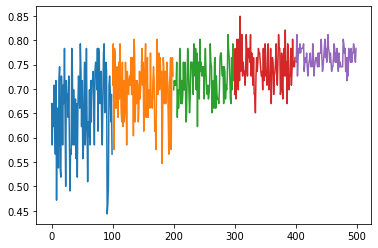

In [33]:
frame.groupby("Frac")["TestAcc"].plot()

<AxesSubplot:xlabel='Frac'>

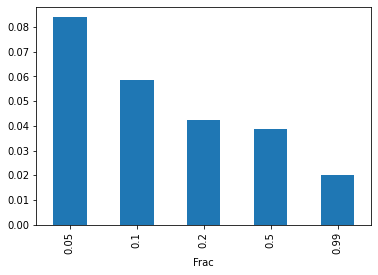

In [35]:
frame.groupby("Frac")["TestAcc"].std().plot(kind="bar")

<AxesSubplot:xlabel='TestAcc', ylabel='NodeCount'>

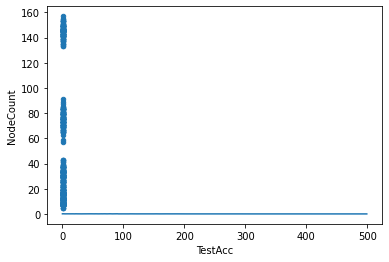

In [41]:
frame[["TestAcc", "NodeCount"]].plot(x="TestAcc", y="NodeCount", kind="scatter")
(frame["TestAcc"]/frame["NodeCount"]).plot()